In [134]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics as ms
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib.pyplot as plt

mnist_digits = fetch_openml('mnist_784', version=1)
mnist_digits.keys()

x = mnist_digits["data"]
y = mnist_digits["target"]

C:\Users\shaan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [99]:

print(x['pixel300'])

0          0.0
1          0.0
2        198.0
3          0.0
4        225.0
         ...  
69995    255.0
69996      0.0
69997    254.0
69998    254.0
69999      0.0
Name: pixel300, Length: 70000, dtype: float64


In [120]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [122]:
model = SGDClassifier(random_state=42)
model.fit(x_train, y_train) 

SGDClassifier(random_state=42)

In [123]:
y_pred = model.predict(x_test)

In [124]:
print(y_pred)
print(y_test)

['7' '2' '1' ... '8' '5' '6']
60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [125]:
ytest_list = y_test.tolist()
ypred_list = y_pred.tolist()

ExactlyCorrect = 0
for actual, prediction in zip(ytest_list, ypred_list):
    print(f"Actual: {actual}, Prediction: {prediction}")
    if actual == prediction:
        ExactlyCorrect+= 1
        
print()       
print(f"NUmber of times Prediction correctly predicted exact acutal number: {ExactlyCorrect}")

Actual: 7, Prediction: 7
Actual: 2, Prediction: 2
Actual: 1, Prediction: 1
Actual: 0, Prediction: 0
Actual: 4, Prediction: 4
Actual: 1, Prediction: 1
Actual: 4, Prediction: 5
Actual: 9, Prediction: 1
Actual: 5, Prediction: 6
Actual: 9, Prediction: 9
Actual: 0, Prediction: 0
Actual: 6, Prediction: 6
Actual: 9, Prediction: 9
Actual: 0, Prediction: 0
Actual: 1, Prediction: 1
Actual: 5, Prediction: 5
Actual: 9, Prediction: 9
Actual: 7, Prediction: 7
Actual: 3, Prediction: 5
Actual: 4, Prediction: 4
Actual: 9, Prediction: 9
Actual: 6, Prediction: 6
Actual: 6, Prediction: 6
Actual: 5, Prediction: 5
Actual: 4, Prediction: 4
Actual: 0, Prediction: 0
Actual: 7, Prediction: 7
Actual: 4, Prediction: 4
Actual: 0, Prediction: 0
Actual: 1, Prediction: 1
Actual: 3, Prediction: 3
Actual: 1, Prediction: 1
Actual: 3, Prediction: 3
Actual: 4, Prediction: 0
Actual: 7, Prediction: 7
Actual: 2, Prediction: 2
Actual: 7, Prediction: 7
Actual: 1, Prediction: 1
Actual: 2, Prediction: 3
Actual: 1, Prediction: 1


In [126]:
accuracy = (ExactlyCorrect/len(x_test))*100
print(accuracy)

87.4


In [133]:
print(model.coef_)
print(model.intercept_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ -214.23804761   -31.47820709  -243.39283758  -412.61204135
  -161.56175199   103.02146015  -245.40214746   -32.70213188
 -1297.23305113  -570.06078343]


In [84]:
notrightindex = []
wrong_pred = []
actualNumb = []

# loop over both lists and compare the elements at each index
for i in range(len(ytest_list)):
    if ytest_list[i] != ypred_list[i]:
        notrightindex.append(i)
        print("Index", i, "is different:", ytest_list[i], "!=", ypred_list[i])
print(notrightindex)

for i in notrightindex:
    wrong_pred.append(int(ypred_list[i]))
    actualNumb.append(int(ytest_list[i]))

print(wrong_pred[:10])
print(actualNumb[:10])

Index 8 is different: 5 != 4
Index 9 is different: 9 != 8
Index 18 is different: 3 != 7
Index 38 is different: 2 != 3
Index 45 is different: 5 != 3
Index 59 is different: 5 != 7
Index 66 is different: 6 != 7
Index 77 is different: 2 != 8
Index 116 is different: 4 != 8
Index 119 is different: 2 != 8
Index 124 is different: 7 != 9
Index 139 is different: 4 != 8
Index 144 is different: 7 != 2
Index 149 is different: 2 != 9
Index 151 is different: 9 != 8
Index 159 is different: 4 != 9
Index 182 is different: 5 != 8
Index 193 is different: 9 != 7
Index 195 is different: 3 != 9
Index 211 is different: 5 != 7
Index 217 is different: 6 != 4
Index 229 is different: 7 != 9
Index 241 is different: 9 != 8
Index 244 is different: 2 != 7
Index 245 is different: 3 != 0
Index 259 is different: 6 != 0
Index 264 is different: 9 != 7
Index 275 is different: 4 != 9
Index 290 is different: 8 != 4
Index 291 is different: 2 != 3
Index 303 is different: 2 != 7
Index 304 is different: 4 != 8
Index 305 is diffe

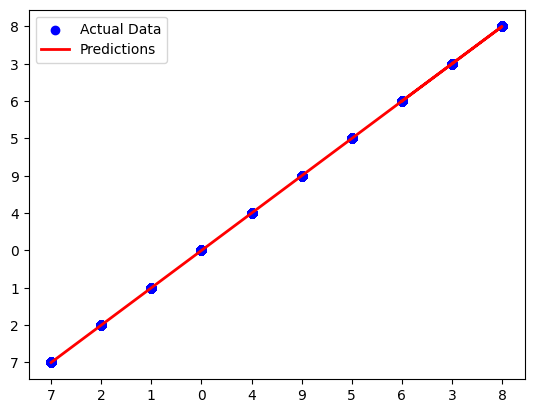

In [135]:
plt.scatter(y_test, y_test, color='blue', label='Actual Data')
plt.plot(y_pred, y_pred, color='red', linewidth=2, label='Predictions')
plt.legend()
plt.show()

In [81]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
%matplotlib inline
import random
import matplotlib.pyplot as plt

In [82]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        


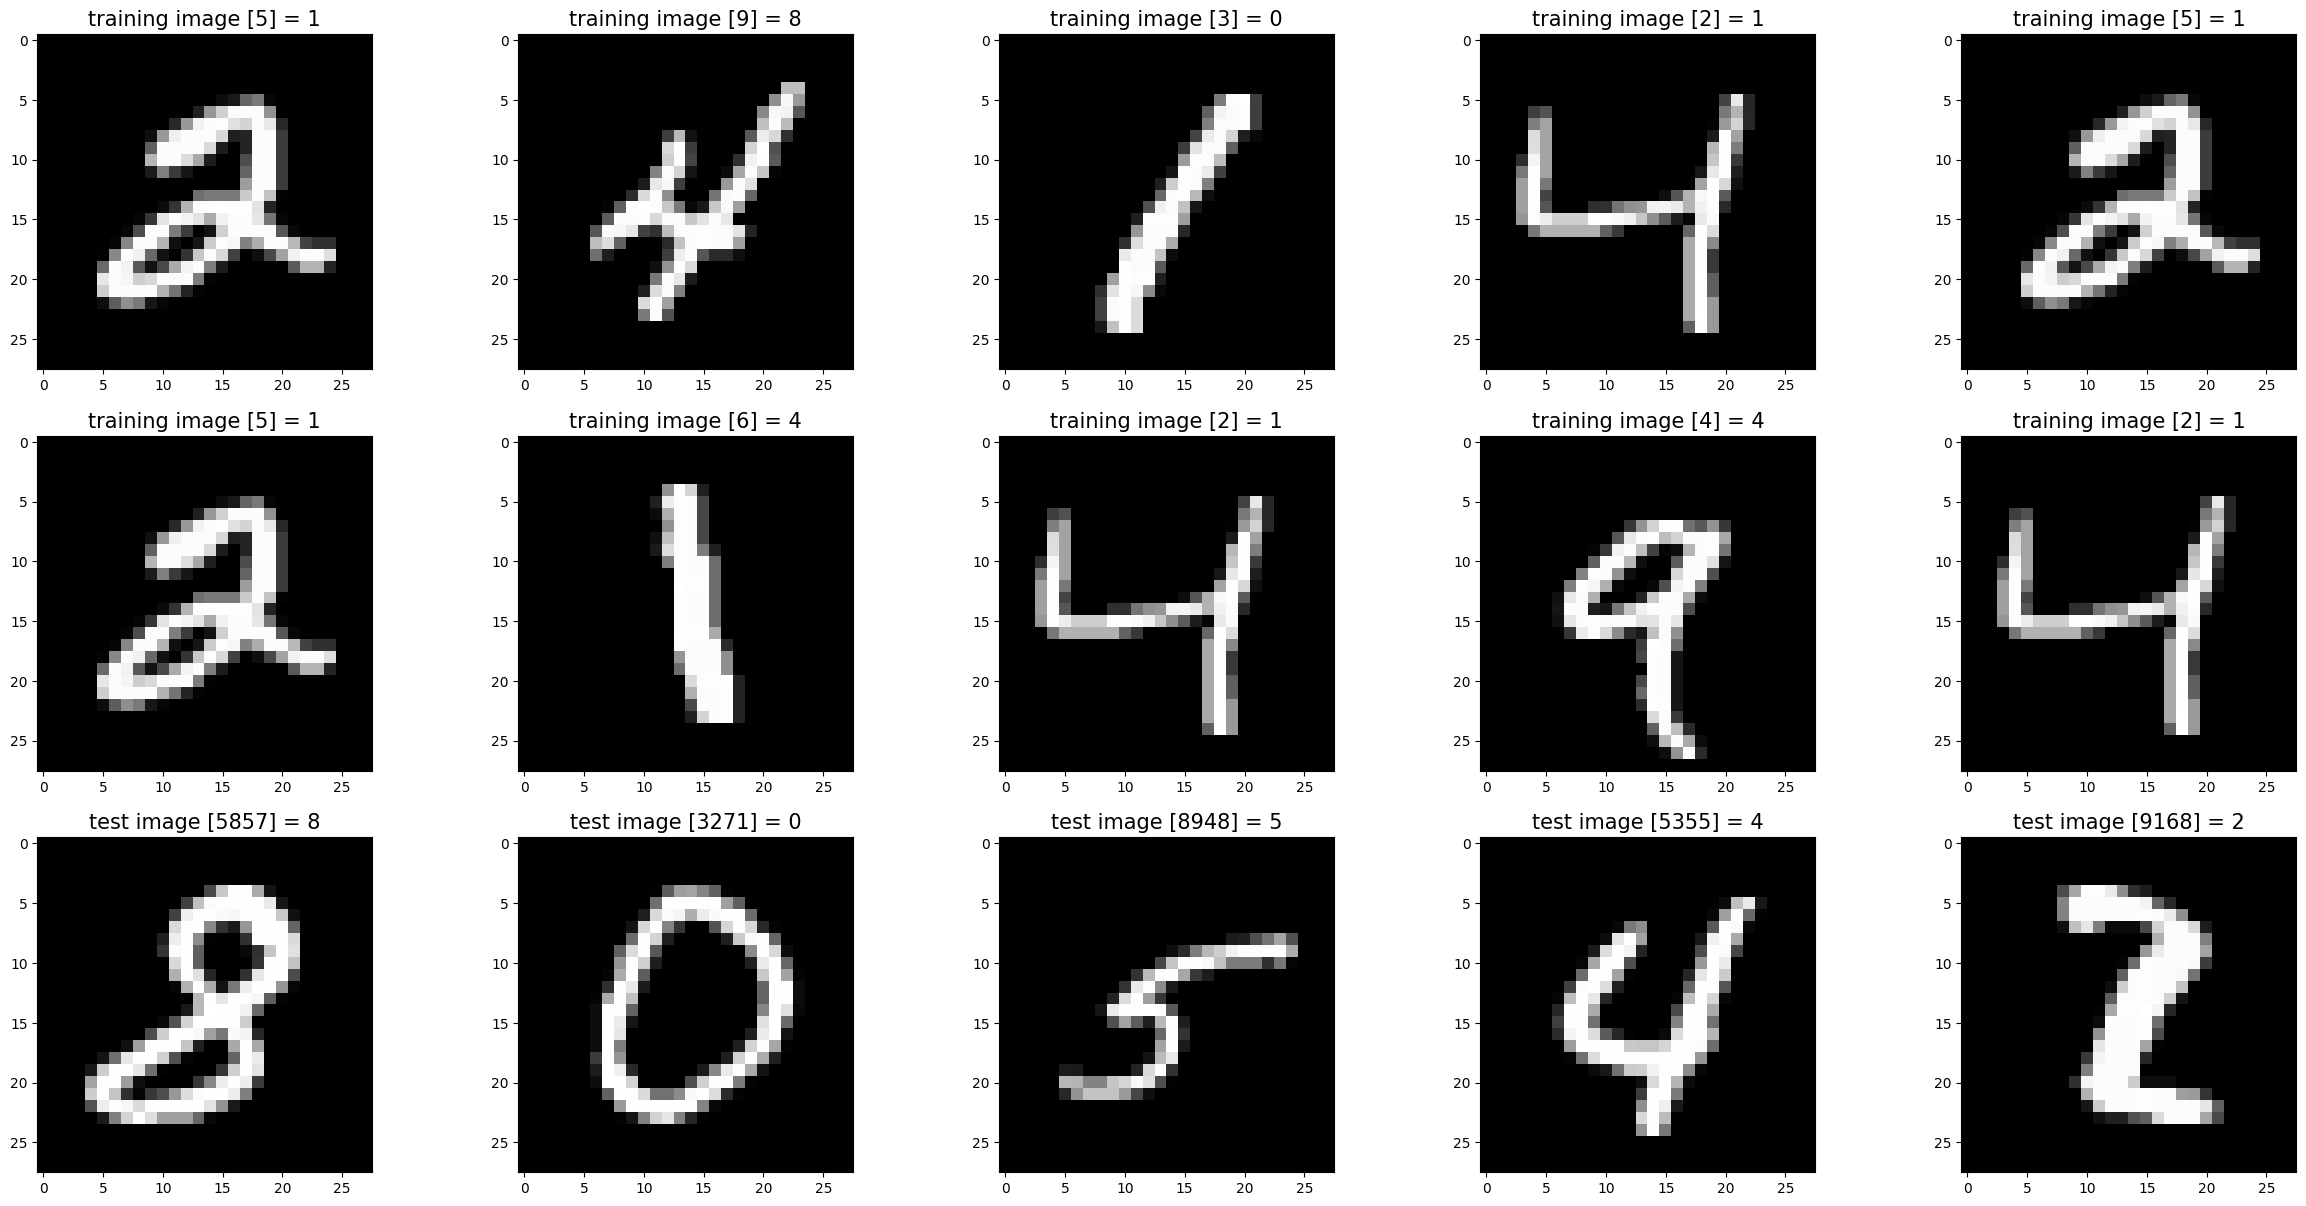

In [85]:
# Set file paths based on added MNIST Datasets
#
input_path = 'C:\\Users\\shaan\\Downloads\\MNIST_images'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    #r = random.randint(1, 60000)
    r = actualNumb[i]
    
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_pred[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [ ]:
print(x_train[0])

KeyError: 0

In [ ]:
for i in range(len(x_train[1])):
    xlist = x_train[10][i].tolist()
    print(xlist)

